### Normal Distribution vs Double Exponential Distribution

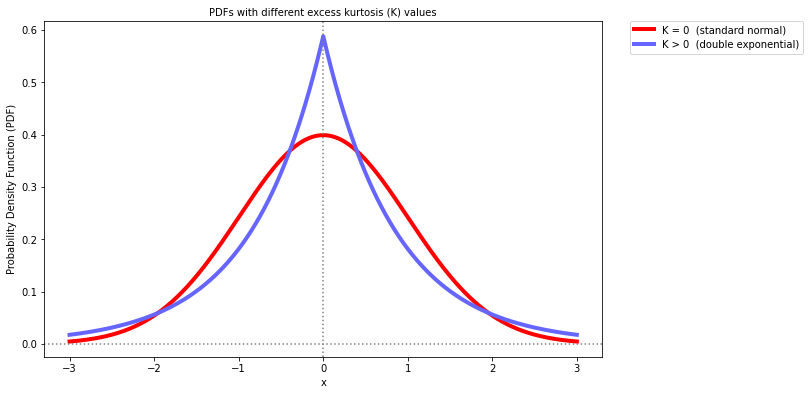

In [6]:
# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(10, 6.18)) 
w = 4 

# === Definitions ===
range_min, range_max, step = -3.0, 3.0, 0.001                                  # the end points and step size of the range for plotting PDF values
x_axis = np.arange(-range_max, range_max, step)                                # x (horizontal) coordinates of the points of the PDF curves
prob_dens_normal_distribution = stats.norm.pdf(x_axis, 0, 1)                   # compute PDF values for the normal distribution
prob_dens_double_exponential_distribution = stats.laplace.pdf(x_axis, 0, 0.85) # compute double exponential PDF values
my_fontsize = 10 

# === Plotting ===
plt.plot(x_axis, prob_dens_normal_distribution, color='#ff0000', 
         label="K = 0  (standard normal)", lw=w)
plt.plot(x_axis, prob_dens_double_exponential_distribution, 
         color='#6666ff', label="K > 0  (double exponential)", lw=w)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize=my_fontsize)       
plt.xlabel('x', fontsize=my_fontsize) 
plt.ylabel('Probability Density Function (PDF)', 
           fontsize=my_fontsize) 
plt.title('PDFs with different excess kurtosis (K) values', 
          fontsize=my_fontsize) 
plt.tick_params(labelsize=my_fontsize) 
plt.axhline(0, c='gray', ls='dotted') 
plt.axvline(0, c='gray', ls='dotted') 
plt.show(); 

### Rescaled random walk or Wiener process

Wiener process is a limit of a random walk. 
$${\displaystyle{z\ (\ t\ )=\frac{1}{\sqrt{n}}\sum_{i\ =\ 1}^{\left\lfloor\ n\ t\ \right\rfloor} x_i}}$$

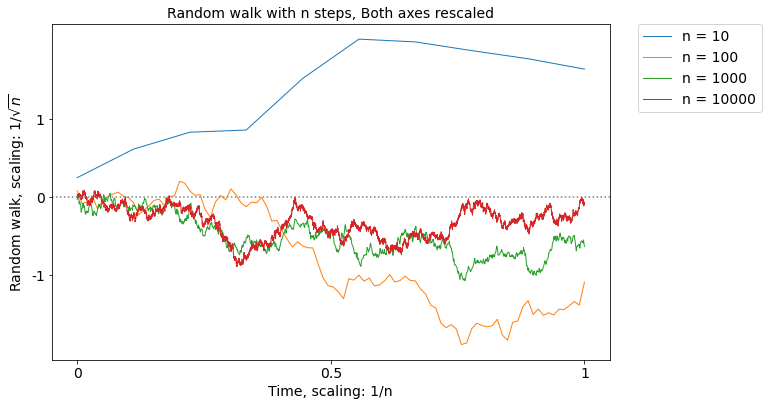

In [7]:
# === Importing libraries ===
import numpy as np
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 6.18))                           
w = 1                                                    

# === Rescaled random walk ===
pow_max = 4
for n in ([int(np.power(10.0,x+1)) for x in np.arange(pow_max)]):
    # === Definitions ===
    random_steps = np.random.normal(0, 1, n)                                               # n random steps, each selected from a std. normal distribution
    cumulated_random_steps = np.cumsum(random_steps)                                       # cumulated sum of the random steps
    rescaled_cumulated_random_steps = [ x / np.sqrt(n) for x in cumulated_random_steps ]   # rescaling cumulated sums 
    rescaled_time_points = np.linspace(0, 1, n)                                            # the list of n time points between 0 and 1
    # === Plotting ===
    plt.plot(rescaled_time_points, rescaled_cumulated_random_steps, label="n = %d" % n, lw=1)

# === Plot properties ===
my_fontsize = 14                                                
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0., 
           fontsize=my_fontsize)                                
plt.axhline(0, c='gray', ls='dotted')                           # horizontal zero axis, dotted
plt.title('Random walk with n steps, Both axes rescaled', 
          fontsize=my_fontsize)
plt.xlabel('Time, scaling: 1/n', 
           fontsize=my_fontsize) 
plt.ylabel('Random walk, scaling: $1/\sqrt{n}$', 
           fontsize=my_fontsize) 

# === Plot ticks ===
ax = plt.gca()                                             # gca: get current axes, access the properties of the plot
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'], fontsize=my_fontsize)
ax.set_yticks([-1,0,1])
ax.set_yticklabels(['-1','0','1'], fontsize=my_fontsize)
plt.tick_params(labelsize=my_fontsize)                     # tick label size

plt.show();                                                # display the entire plot

### Black Scholes Models

In [8]:
# === Importing libraries ===
import numpy as np
from scipy.special import erf

# === The pricing function ===
def black_scholes_eur_call(r,T,S0,sigma,K_vec):
    ''' Function for the Black-Scholes pricer of the risk-neutral pricing
        of a European call option on a non-dividend-paying underlying stock
        
        This function calcuates the option price for a range of strike price (K) values

    Attributes
    ==========
    r:     float  the constant risk-free short rate
    T:     float  the time to maturity given in year fractions
    S0:    float  current stock price, also called: spot price
    sigma: float  volatility of the underlying stock
    K_vec: vec float - list of strike price values for which the price should be calculated

    Note
    ====
    sigma  has to be  >  0
    r      has to be  >  0

    Output
    ======
    List of call option values, one value for each strike price. '''
    
    # --- Conversions --- 
    r     = float(r)
    T     = float(T)
    S0    = float(S0)
    sigma = float(sigma)

    # --- Checking constrains ---
    assert sigma > 0
    assert r > 0

    # --- d1 and d2 ---
    d1_vec = ( np.log( S0 / K_vec ) + ( r + 0.5 * sigma**2 ) * T ) / ( sigma * T**0.5 )
    d2_vec = d1_vec - sigma * T**0.5

    # --- N(d1) and N(d2) ---
    N_d1_vec = 0.5 * ( 1.0 + erf( d1_vec / np.sqrt(2) ) ) # N(x) = 1/2 * [ 1 + erf(x/sqrt(2)) ]
    N_d2_vec = 0.5 * ( 1.0 + erf( d2_vec / np.sqrt(2) ) )

    # --- Option price ---
    c_vec = N_d1_vec * S0 - K_vec * np.exp((-1.0)*r*T) * N_d2_vec
    
    # --- Return the computed option price values ---
    return c_vec

In [10]:
black_scholes_eur_call(r=0.1,T=3,S0=100,sigma=3,K_vec=70)

99.32929057325148